In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D

In [66]:
df = pd.read_csv('BuyTitleOfferEval.csv', header=0, index_col=0)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605100 entries, 0 to 605099
Data columns (total 18 columns):
CatalogID                605100 non-null int64
CatalogBinding           605100 non-null object
count_ItemsPriced        605100 non-null int64
count_ItemsSold          605100 non-null int64
pct_SellThrough          605100 non-null float64
Chain_Avg_Sale_Price     605100 non-null float64
avg_SalePrice            226982 non-null float64
avg_AccDaysCountItems    605100 non-null float64
avg_AccDaysSoldItems     605100 non-null float64
pred_BuyOfferGrade       605100 non-null object
targ_BuyOfferGrade40     605100 non-null object
targ_BuyOfferGrade42     605100 non-null object
pred_BuyOfferPct         605100 non-null float64
targ_BuyOfferPct40       605100 non-null float64
targ_BuyOfferPct42       605100 non-null float64
pred_SuggestedOffer      605100 non-null float64
targ_SuggestedOffer40    226982 non-null float64
targ_SuggestedOffer42    226982 non-null float64
dtypes: float64(1

In [68]:
filt_lowitemcount = df['count_ItemsPriced'] >= 5

In [69]:
df_STpred = df[filt_lowitemcount].groupby('pred_BuyOfferGrade')[['count_ItemsPriced', 'count_ItemsSold']].sum()
df_STpred['SellThroughPct'] = df_STpred['count_ItemsSold']/df_STpred['count_ItemsPriced']
df_STpred

,count_ItemsPriced,count_ItemsSold,SellThroughPct
pred_BuyOfferGrade,,,
A,16781,12558,0.748346
B,141867,90441,0.637506
C,476335,183048,0.384284
D,443767,84902,0.191321
E,174799,23658,0.135344


In [38]:
df_STtarg = df[filt_lowitemcount].groupby('targ_BuyOfferGrade40')[['count_ItemsPriced', 'count_ItemsSold']].sum()
df_STtarg['SellThroughPct'] = df_STtarg['count_ItemsSold']/df_STtarg['count_ItemsPriced']
df_STtarg

,count_ItemsPriced,count_ItemsSold,SellThroughPct
targ_BuyOfferGrade40,,,
A,5490,5308,0.966849
B,350248,200999,0.573876
C,897811,188300,0.209732


In [39]:
df_pred = df[filt_lowitemcount].groupby(['pred_BuyOfferGrade', 'targ_BuyOfferGrade40'])[['count_ItemsPriced', 'count_ItemsSold', 'pred_SuggestedOffer', 'targ_SuggestedOffer40']].sum()

In [40]:
df_allgrades = df_pred.groupby('pred_BuyOfferGrade').sum()
df_pred=df_pred.merge(df_allgrades, how='left', left_index=True, right_index=True, suffixes=['','_total'])

In [41]:
df_pred.reset_index(inplace=True)

In [42]:
df_pred['grade_AccuracyByCount'] = df_pred['count_ItemsPriced'] / df_pred['count_ItemsPriced_total']

In [43]:
filt_EqualGrades = df_pred['pred_BuyOfferGrade'] == df_pred['targ_BuyOfferGrade40']
#filt_UnequalGrade = df_predcounts['pred_BuyOfferGrade'] != df_predcounts['targ_BuyOfferGrade40']

In [44]:
df_pred

,pred_BuyOfferGrade,targ_BuyOfferGrade40,count_ItemsPriced,count_ItemsSold,pred_SuggestedOffer,targ_SuggestedOffer40,count_ItemsPriced_total,count_ItemsSold_total,pred_SuggestedOffer_total,targ_SuggestedOffer40_total,grade_AccuracyByCount
0,A,A,3516,3397,535.020880,535.74883,16781,12558,2896.782650,2108.74748,0.209523
1,A,B,11168,8438,1892.777840,1387.53889,16781,12558,2896.782650,2108.74748,0.665515
2,A,C,2097,723,468.983930,185.45976,16781,12558,2896.782650,2108.74748,0.124963
3,B,A,1605,1559,488.189340,652.16055,141867,90441,20385.873060,18181.52499,0.011313
4,B,B,114919,80439,14572.609910,14440.13015,141867,90441,20385.873060,18181.52499,0.810047
5,B,C,25343,8443,5325.073810,3089.23429,141867,90441,20385.873060,18181.52499,0.178639
6,C,A,369,352,25.921590,70.99812,476335,183048,37946.434420,43451.66794,0.000775
7,C,B,178660,95031,13675.096710,21849.49427,476335,183048,37946.434420,43451.66794,0.375072
8,C,C,297306,87665,24245.416120,21531.17555,476335,183048,37946.434420,43451.66794,0.624153
9,D,B,35766,13944,1009.761600,6814.82273,443767,84902,8487.585055,32522.01959,0.080596


In [45]:
sns.set_style('whitegrid')

In [46]:
df_pred['count_ItemsPriced']/df_pred['count_ItemsPriced_total']

0     0.209523
1     0.665515
2     0.124963
3     0.011313
4     0.810047
5     0.178639
6     0.000775
7     0.375072
8     0.624153
9     0.080596
10    0.919404
11    0.055693
12    0.944307
dtype: float64

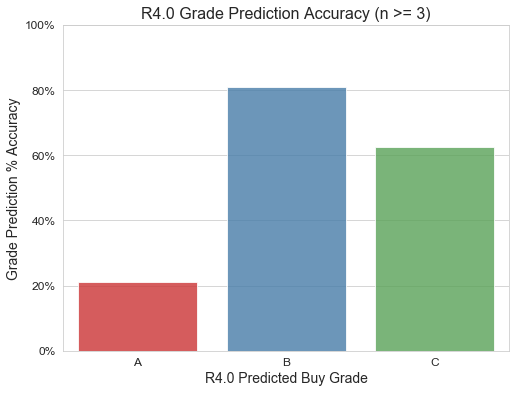

In [47]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=df_pred[filt_EqualGrades]['pred_BuyOfferGrade'],
            y=df_pred[filt_EqualGrades]['count_ItemsPriced']/df_pred[filt_EqualGrades]['count_ItemsPriced_total'],
            palette='Set1', alpha=0.8,
            ax=ax, label='Buy Grades')
ax.set_ylim([0,1])
ax.set_xlabel('R4.0 Predicted Buy Grade', fontsize=14)
ax.set_ylabel('Grade Prediction % Accuracy', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.set_yticklabels(['{:0.0f}%'.format(t*100) for t in ax.get_yticks()])

ax.set_title('R4.0 Grade Prediction Accuracy (n >= 3)', fontsize=16)
#ax.legend(loc='upper right', bbox_to_anchor=(1.12, 0.7), title='Buy Grades', prop=dict(size=12))
plt.show()

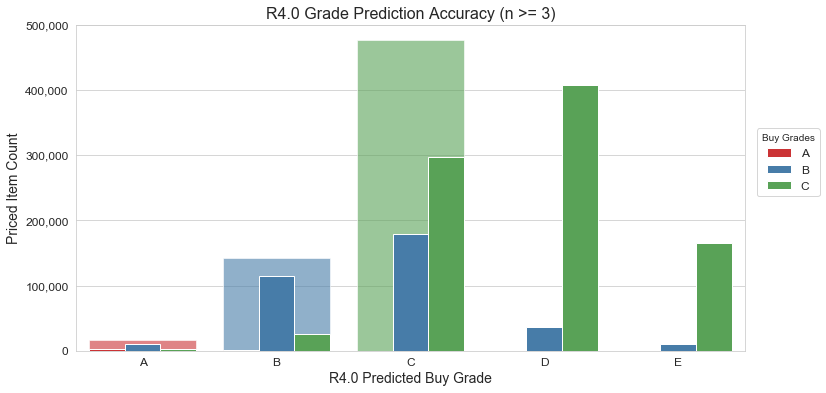

In [48]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x=df_pred[filt_EqualGrades]['pred_BuyOfferGrade'],
            y=df_pred[filt_EqualGrades]['count_ItemsPriced_total'],
            palette='Set1', alpha=0.6,
            ax=ax)

sns.barplot(x=df_pred['pred_BuyOfferGrade'],
            y=df_pred['count_ItemsPriced'],
            hue=df_pred['targ_BuyOfferGrade40'], 
            palette='Set1', 
            ax=ax)

ax.set_xlabel('R4.0 Predicted Buy Grade', fontsize=14)
ax.set_ylabel('Priced Item Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.set_yticklabels(['{:,.0f}'.format(t) for t in ax.get_yticks()])

ax.set_title('R4.0 Grade Prediction Accuracy (n >= 3)', fontsize=16)

ax.legend(loc='upper right', bbox_to_anchor=(1.12, 0.7), title='Buy Grades', prop=dict(size=12))
plt.show()

In [49]:
filt_itemcount1 = df['count_ItemsPriced'] >= 1
df_pred_1 = df[filt_itemcount1].groupby(['pred_BuyOfferGrade', 'targ_BuyOfferGrade40'])[['count_ItemsPriced', 'count_ItemsSold', 'pred_SuggestedOffer', 'targ_SuggestedOffer40']].sum()
df_allgrades_1 = df_pred_1.groupby('pred_BuyOfferGrade').sum()
df_pred_1=df_pred_1.merge(df_allgrades_1, how='left', left_index=True, right_index=True, suffixes=['','_total'])
df_pred_1.reset_index(inplace=True)
df_pred_1['grade_AccuracyByCount'] = df_pred_1['count_ItemsPriced'] / df_pred_1['count_ItemsPriced_total']

In [50]:
filt_EqualGrades_1 = df_pred_1['pred_BuyOfferGrade'] == df_pred_1['targ_BuyOfferGrade40']

In [192]:
df_pred_1['count_ItemsPriced'].sum()

2104599

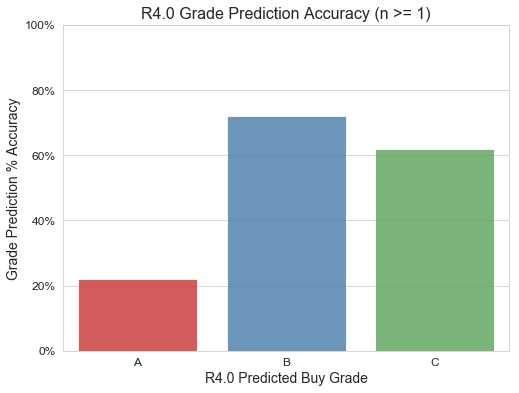

In [51]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=df_pred_1[filt_EqualGrades_1]['pred_BuyOfferGrade'],
            y=df_pred_1[filt_EqualGrades_1]['count_ItemsPriced']/df_pred_1[filt_EqualGrades_1]['count_ItemsPriced_total'],
            palette='Set1', alpha=0.8,
            ax=ax, label='Buy Grades')
ax.set_ylim([0,1])
ax.set_xlabel('R4.0 Predicted Buy Grade', fontsize=14)
ax.set_ylabel('Grade Prediction % Accuracy', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.set_yticklabels(['{:0.0f}%'.format(t*100) for t in ax.get_yticks()])

ax.set_title('R4.0 Grade Prediction Accuracy (n >= 1)', fontsize=16)
#ax.legend(loc='upper right', bbox_to_anchor=(1.12, 0.7), title='Buy Grades', prop=dict(size=12))
plt.show()

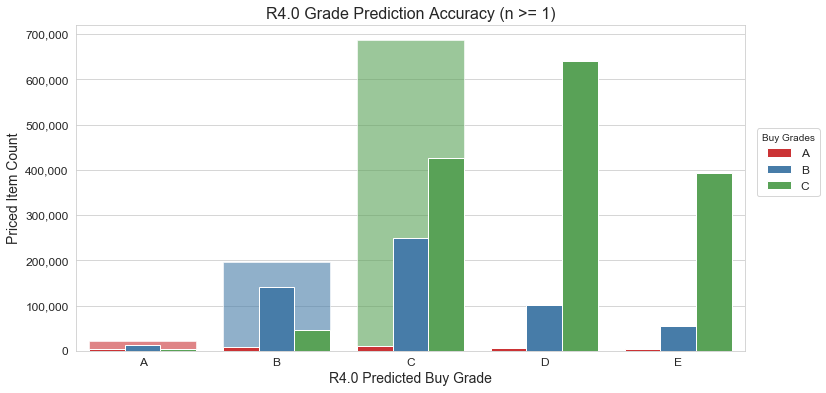

In [52]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x=df_pred_1[filt_EqualGrades_1]['pred_BuyOfferGrade'],
            y=df_pred_1[filt_EqualGrades_1]['count_ItemsPriced_total'],
            palette='Set1', alpha=0.6,
            ax=ax)

sns.barplot(x=df_pred_1['pred_BuyOfferGrade'],
            y=df_pred_1['count_ItemsPriced'],
            hue=df_pred_1['targ_BuyOfferGrade40'], 
            palette='Set1', 
            ax=ax)

ax.set_xlabel('R4.0 Predicted Buy Grade', fontsize=14)
ax.set_ylabel('Priced Item Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
ax.set_yticklabels(['{:,.0f}'.format(t) for t in ax.get_yticks()])

ax.set_title('R4.0 Grade Prediction Accuracy (n >= 1)', fontsize=16)

ax.legend(loc='upper right', bbox_to_anchor=(1.12, 0.7), title='Buy Grades', prop=dict(size=12))
plt.show()

In [53]:
df_pred_1['count_ItemsPriced']/df_pred_1['count_ItemsPriced_total']

0     0.220376
1     0.617345
2     0.162279
3     0.045376
4     0.719242
5     0.235382
6     0.015981
7     0.364572
8     0.619447
9     0.009012
10    0.135792
11    0.855197
12    0.008531
13    0.121745
14    0.869724
dtype: float64

In [54]:
df_pred

,pred_BuyOfferGrade,targ_BuyOfferGrade40,count_ItemsPriced,count_ItemsSold,pred_SuggestedOffer,targ_SuggestedOffer40,count_ItemsPriced_total,count_ItemsSold_total,pred_SuggestedOffer_total,targ_SuggestedOffer40_total,grade_AccuracyByCount
0,A,A,3516,3397,535.020880,535.74883,16781,12558,2896.782650,2108.74748,0.209523
1,A,B,11168,8438,1892.777840,1387.53889,16781,12558,2896.782650,2108.74748,0.665515
2,A,C,2097,723,468.983930,185.45976,16781,12558,2896.782650,2108.74748,0.124963
3,B,A,1605,1559,488.189340,652.16055,141867,90441,20385.873060,18181.52499,0.011313
4,B,B,114919,80439,14572.609910,14440.13015,141867,90441,20385.873060,18181.52499,0.810047
5,B,C,25343,8443,5325.073810,3089.23429,141867,90441,20385.873060,18181.52499,0.178639
6,C,A,369,352,25.921590,70.99812,476335,183048,37946.434420,43451.66794,0.000775
7,C,B,178660,95031,13675.096710,21849.49427,476335,183048,37946.434420,43451.66794,0.375072
8,C,C,297306,87665,24245.416120,21531.17555,476335,183048,37946.434420,43451.66794,0.624153
9,D,B,35766,13944,1009.761600,6814.82273,443767,84902,8487.585055,32522.01959,0.080596


In [55]:
arr_CostPred = df_pred_1.groupby('pred_BuyOfferGrade')['pred_SuggestedOffer_total'].sum()
arr_CostTarg = df_pred_1.groupby('targ_BuyOfferGrade40')['targ_SuggestedOffer40_total'].sum()
df_Cost = pd.DataFrame(index=arr_CostPred.index)
df_Cost['targ_SuggestedOffer'] = df_pred_1[filt_EqualGrades_1].groupby('pred_BuyOfferGrade')['pred_SuggestedOffer_total'].sum()
df_Cost['pred_SuggestedOffer'] = df_pred_1[filt_EqualGrades_1].groupby('targ_BuyOfferGrade40')['targ_SuggestedOffer40_total'].sum()
df_Cost.fillna(0, inplace=True)

In [56]:
filt_GradeDTotalCost = (df_pred_1['pred_BuyOfferGrade'] == 'D') & (df_pred_1['targ_BuyOfferGrade40'] == 'C')
filt_GradeETotalCost = (df_pred_1['pred_BuyOfferGrade'] == 'E') & (df_pred_1['targ_BuyOfferGrade40'] == 'C')
df_Cost.rename(columns={'pred_SuggestedOffer':'Predicted Grade Cost', 'targ_SuggestedOffer': 'Actual Grade Cost'}, inplace=True)
df_Cost.at['D', 'Predicted Grade Cost'] = df_pred_1[filt_GradeDTotalCost]['pred_SuggestedOffer_total']
#df_Cost.at['E', 'Predicted Grade Cost'] = df_pred[filt_GradeETotalCost]['pred_SuggestedOffer_total']
df_Cost

,Actual Grade Cost,Predicted Grade Cost
pred_BuyOfferGrade,,
A,25804.18873,14304.14005
B,131868.29718,92552.69204
C,231607.74127,181228.72398
D,0.00000,56459.28051
E,0.00000,0.00000


In [57]:
df_Cost_comp = pd.melt(df_Cost.reset_index(), id_vars=['pred_BuyOfferGrade'], value_vars=df_Cost.columns)
df_Cost_comp

,pred_BuyOfferGrade,variable,value
0,A,Actual Grade Cost,25804.18873
1,B,Actual Grade Cost,131868.29718
2,C,Actual Grade Cost,231607.74127
3,D,Actual Grade Cost,0.00000
4,E,Actual Grade Cost,0.00000
5,A,Predicted Grade Cost,14304.14005
6,B,Predicted Grade Cost,92552.69204
7,C,Predicted Grade Cost,181228.72398
8,D,Predicted Grade Cost,56459.28051
9,E,Predicted Grade Cost,0.00000


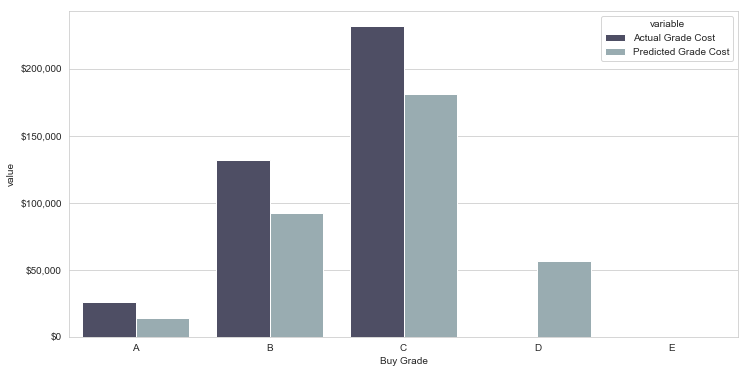

In [58]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data=df_Cost_comp,
            x='pred_BuyOfferGrade',
            y='value',
            hue='variable',
            alpha=1,
            palette='bone',
            ax=ax)
ax.set_yticklabels('${:,.0f}'.format(int(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Grade')
ax.set_ylabel
plt.show()

In [59]:
df_Cost

,Actual Grade Cost,Predicted Grade Cost
pred_BuyOfferGrade,,
A,25804.18873,14304.14005
B,131868.29718,92552.69204
C,231607.74127,181228.72398
D,0.00000,56459.28051
E,0.00000,0.00000


In [60]:
df_CostPcts = df_Cost.drop(index=['D', 'E'], axis=0)

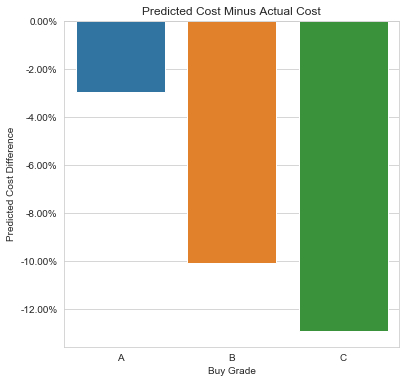

In [61]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.barplot(x=df_CostPcts.index,
            y=(df_CostPcts['Predicted Grade Cost'] - df_CostPcts['Actual Grade Cost'])/(df_CostPcts.sum()['Actual Grade Cost']),
            alpha=1,
            ax=ax)
ax.set_yticklabels('{:,.2%}'.format(float(y)) for y in ax.get_yticks())
ax.set_xlabel('Buy Grade')
ax.set_ylabel('Predicted Cost Difference')
plt.title('Predicted Cost Minus Actual Cost')
plt.show()

In [62]:
df_Cost.sum()['Predicted Grade Cost'] - df_Cost.sum()['Actual Grade Cost']

-44735.390599991195

In [63]:
df_Cost.sum()['Predicted Grade Cost']

344544.8365800119

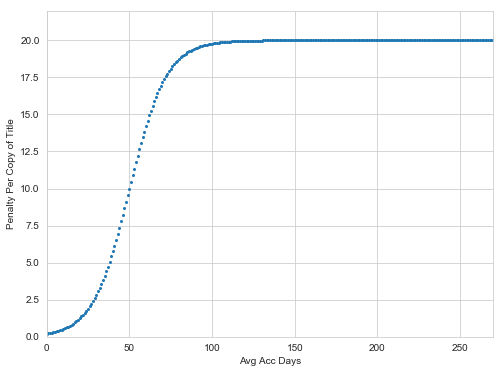

In [168]:
plt.subplots(figsize=(8,6))
eg_x = [d for d in np.arange(0, 500, 1)]
eg_y = [(20/(1+np.exp(-0.09*(x-50)))) for x in eg_x]
plt.scatter(eg_x, eg_y, s=4)
plt.xlim([0, 270])
plt.ylim([0, 22])
plt.ylabel('Penalty Per Copy of Title')
plt.xlabel('Avg Acc Days')
plt.show()

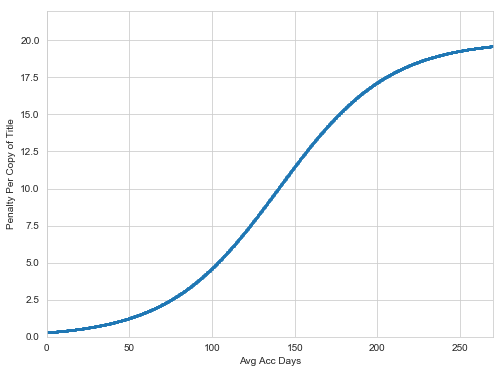

In [190]:
plt.subplots(figsize=(8,6))
eg_x = [d for d in np.arange(0, 500, .25)]
eg_y = [(20/(1+np.exp(-0.03*(x-140)))) for x in eg_x]
plt.scatter(eg_x, eg_y, s=4)
plt.xlim([0, 270])
plt.ylim([0, 22])
plt.ylabel('Penalty Per Copy of Title')
plt.xlabel('Avg Acc Days')
plt.show()

In [83]:
print((eg_x, eg_y))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, -2147483648, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [191]:
2.7//1

2.0